In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# logistical forecast (classification)

In [3]:
# Assuming dataset is your DataFrame containing both features and target variable
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

dataset.iloc[:, :-1]: Here the Pandas function is being used iloc to access the data in dataset. iloc allows indexing by integers, so iloc[:, :-1]selects all rows ( :) and all columns except the last one ( :-1). In other words, this selects all columns of the DataFrame except the last column, which is usually done to separate the features (independent variables) from the target variable (dependent variable).

dataset.iloc[:, -1]: Similar to the previous one, iloc[:, -1]selects all rows ( :) but only the last column ( -1). This selects only the last column of the DataFrame, which is normally considered the target variable (dependent variable).

In summary, these two lines of code divide the DataFrame dataset into two parts:

xcontains all features (independent variables) of the dataset as it excludes the last column.
ycontains the target variable (dependent variable), as it only includes the last column.
This is a common data preparation for training machine learning models, where x will be used to train the model and y will be the target that the model will try to fit to.

In [4]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
predict = model.predict(x_test)

In [7]:
x_test["prediction"] = predict

y_test = pd.DataFrame(y_test)

x_test["real"] = y_test["species"]
x_test.head(20)

,sepal_length,sepal_width,petal_length,petal_width,prediction,real
86,6.7,3.1,4.7,1.5,versicolor,versicolor
28,5.2,3.4,1.4,0.2,setosa,setosa
123,6.3,2.7,4.9,1.8,virginica,virginica
131,7.9,3.8,6.4,2.0,virginica,virginica
78,6.0,2.9,4.5,1.5,versicolor,versicolor
7,5.0,3.4,1.5,0.2,setosa,setosa
23,5.1,3.3,1.7,0.5,setosa,setosa
100,6.3,3.3,6.0,2.5,virginica,virginica
34,4.9,3.1,1.5,0.2,setosa,setosa
139,6.9,3.1,5.4,2.1,virginica,virginica


# Golf Dataset - Classification

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [29]:
golf = pd.read_excel("golf.xlsx")
golf.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [31]:
x = pd.get_dummies(golf[["clima", "temp", "umidade", "vento"]])
# Converter valores booleanos para 1 ou 0
x = x.astype(int)
x.head()

,clima_overcast,clima_rainy,clima_sunny,temp_cool,temp_hot,temp_mild,umidade_high,umidade_normal,vento_no,vento_yes
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0


In [32]:
y = golf[["jogar"]]

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

In [36]:
tree = tree.DecisionTreeClassifier()

In [39]:
model =tree.fit(x,y)
model

DecisionTreeClassifier()

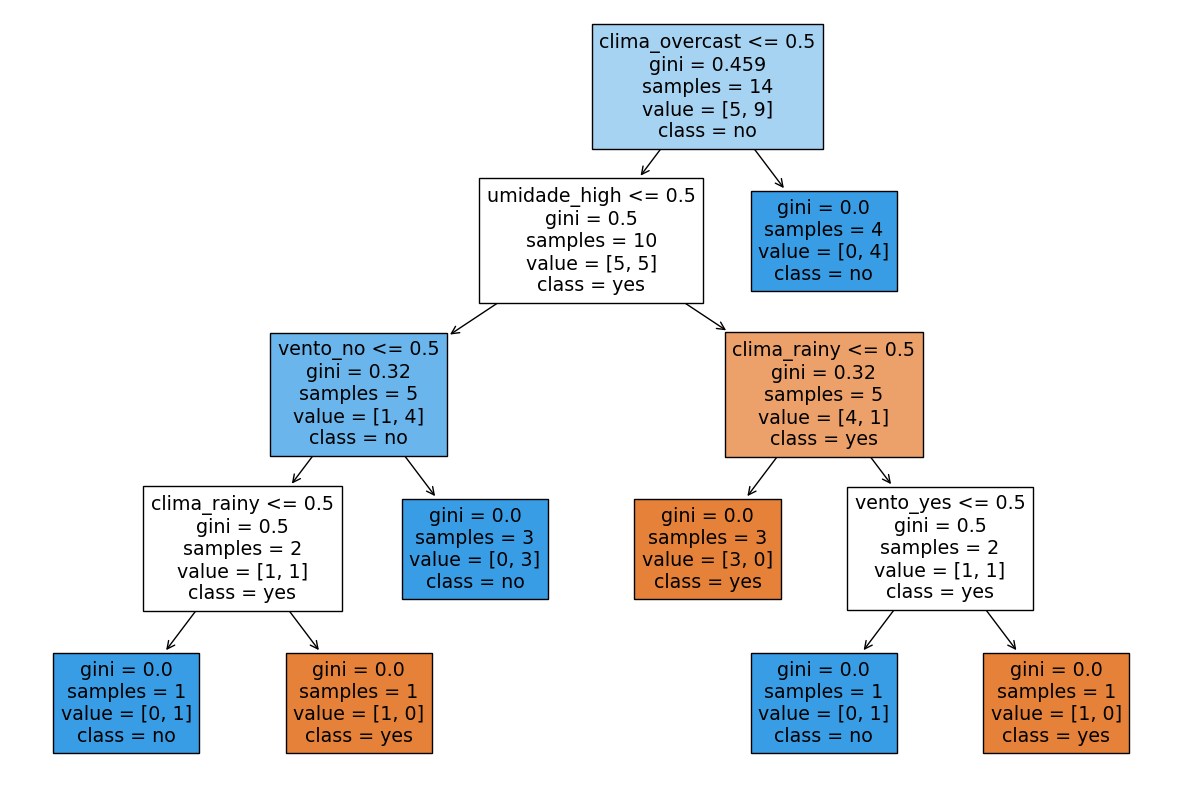

In [43]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,
               feature_names=x.columns,
               class_names=["yes", "no"],
               filled=True)
plt.show()

### Others

In [44]:
golf = pd.read_excel("golf.xlsx")
golf.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

le.fit(golf.clima)
golf.clima = le.transform(golf.clima)

le.fit(golf.temp)
golf.temp = le.transform(golf.temp)

le.fit(golf.umidade)
golf.umidade = le.transform(golf.umidade)

le.fit(golf.vento)
golf.vento = le.transform(golf.vento)

le.fit(golf.jogar)
golf.jogar = le.transform(golf.jogar)

In [11]:
golf.head()

,clima,temp,umidade,vento,jogar
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


## Training Model

In [47]:
x = golf.iloc[:, :-1]
y = golf[["jogar"]]

In [58]:
model = LogisticRegression()

model.fit(x,y)

C:\Users\dsant\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
predict = model.predict(x)

In [61]:
x["predict"] = predict

y = pd.DataFrame(y)

In [63]:
x["real"] = y["jogar"]
x.head(10)

,clima,temp,umidade,vento,prediction,real,predict
0,2,1,0,0,0,0,0
1,2,1,0,1,0,0,0
2,0,1,0,0,1,1,1
3,1,2,0,0,1,1,1
4,1,0,1,0,1,1,1
5,1,0,1,1,1,0,0
6,0,0,1,1,1,1,1
7,2,2,0,0,0,0,0
8,2,0,1,0,1,1,1
9,1,2,1,0,1,1,1


### 100% of accuracy